# Abstract

For the time being I have mainly used CTR to explore data. I will try to use other evalution metrics too later

# Data Exploration

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from data_loader import DataLoader

%matplotlib inline
pd.set_option('display.max_columns', None)

In [8]:
dl= DataLoader()
path = "C:/Users/Akis-/OneDrive/Masters/Web Economics/Data/"
filename = "validation.csv"
dl.load_file(path,filename)
df = dl.get_df_copy()
train = df

2018-02-26 14:51:46,223 : INFO : Loading C:/Users/Akis-/OneDrive/Masters/Web Economics/Data/validation.csv
2018-02-26 14:51:49,102 : INFO : file  loaded


In [9]:
train.shape

(303925, 25)

In [10]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303925 entries, 0 to 303924
Data columns (total 25 columns):
click             303925 non-null int64
weekday           303925 non-null int64
hour              303925 non-null int64
bidid             303925 non-null object
userid            303925 non-null object
useragent         303925 non-null object
IP                303925 non-null object
region            303925 non-null int64
city              303925 non-null int64
adexchange        297749 non-null float64
domain            286993 non-null object
url               293075 non-null object
urlid             0 non-null float64
slotid            303925 non-null object
slotwidth         303925 non-null int64
slotheight        303925 non-null int64
slotvisibility    303925 non-null object
slotformat        303925 non-null object
slotprice         303925 non-null int64
creative          303925 non-null object
bidprice          303925 non-null int64
payprice          303925 non-null int64


In [23]:
print(train.head(20))
print("Pay price avergae:",train["payprice"].mean())
print("Bid price average", train["bidprice"].mean())

    click  weekday  hour                                     bidid  \
0       0        4    20  bbcb813b6166538503d8b33a5602d7d72f6019dc   
1       0        1    21  5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d   
2       0        4     8  f6ece71dae81d6b16bfb24ad6dd5611472d4c673   
3       0        5    15  b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb   
4       0        1    18  0899bf144249458ea9c89188473694bf44c7ca15   
5       0        6     1  f4c6a9a3b1db6da035c7e2a36d4f5e389095beca   
6       0        0    18  786a2940f225482dc04d455dc7a7fea436b02e03   
7       0        6    21  17ada861c6ed0616f88312ba0d3d76c0f95b4940   
8       0        0    11  6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a   
9       0        5    15  442ffca310e325abc255e8ff97d9812051336acd   
10      0        0    12  a74b7ba02a4ccf3571106afb0c800b630a256d9c   
11      0        6    17  f073b222522a086278c6e52ac0e4012dd797baea   
12      0        5    13  8d3c0aa9cf1d9266f686a3ae0efa937ea0f7db3b   
13      0        0  

### Null values

In [13]:
obj_cols = list(train.select_dtypes(include=['object']).columns)
nulls_list = [train[col].str.match("null").sum()*100/train.shape[0] for col in obj_cols]
nulls_df = pd.DataFrame(index = obj_cols, columns = ["Nulls_Percentage"], data = nulls_list)
nulls_df

,Nulls_Percentage
bidid,0.0
userid,0.0
useragent,0.0
IP,0.0
domain,0.0
url,0.0
slotid,0.0
slotvisibility,0.0
slotformat,0.0
creative,0.0


# Aggregated Statistics

In [14]:
def Aggregated_CTR(df, by = "weekday"):
    
    """
    Takes less time to execute than barplot.
    """
    
    feat = df[by].unique()
    res = pd.DataFrame(columns = [by, "CTR"])
    i = 0
    
    for f in feat:
        
        df_ = df.loc[df[by] == f]
        
        # Number of impressions
        impr = df_.shape[0]

        # Number of clicks
        clicks = df_["click"].sum()

        # CTR
        ctr = clicks*100/impr
        
        # Store results to dataframe
        res.loc[i] = [f, ctr]
        i+=1
        
    return res

### Weekday

In [15]:
# plt.figure(figsize = (12,6))
# sns.barplot(x = "weekday", y = "CTR", data = Aggregated_CTR(train, "weekday"), color = "lightgreen")

Text(0,0.5,'CTR')

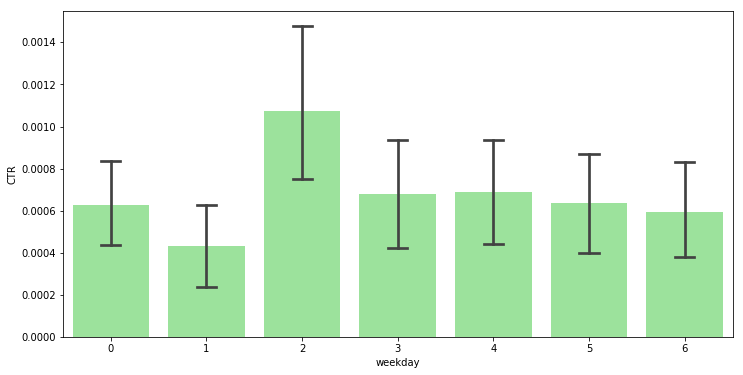

In [16]:
plt.figure(figsize = (12,6))
sns.barplot(x = "weekday", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Hour

In [11]:
# plt.figure(figsize = (12,6))
# sns.barplot(x = "hour", y = "CTR", data = Aggregated_CTR(train, "hour"), color = "lightgreen")

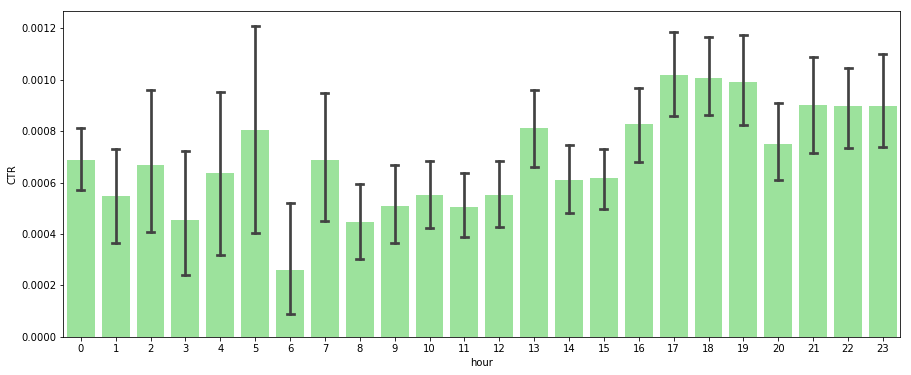

In [12]:
plt.figure(figsize = (15,6))
sns.barplot(x = "hour", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

Question: Weekday and hour must be used as numerical or categorical features? Probably we will need to check both and decide.

Tuesday (or Wednesday) seems the most productive day of the week. Evening seems to be the most productive part of the day (17:00 - 19:00 and until 23:00). Seems kind of justified: Maybe people after having finished their work or uni, are more relaxed and maybe even search for goods to buy, so it is more probable to click an advertisement. However, a question would be is this true for every day of the week (e.g. is evening the most productive part of the day for all weekdays)? In addition to that, based on the specific part of the day, which day is the most productive? Let's create some FacetGrids to check these things...

C:\Users\asfak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


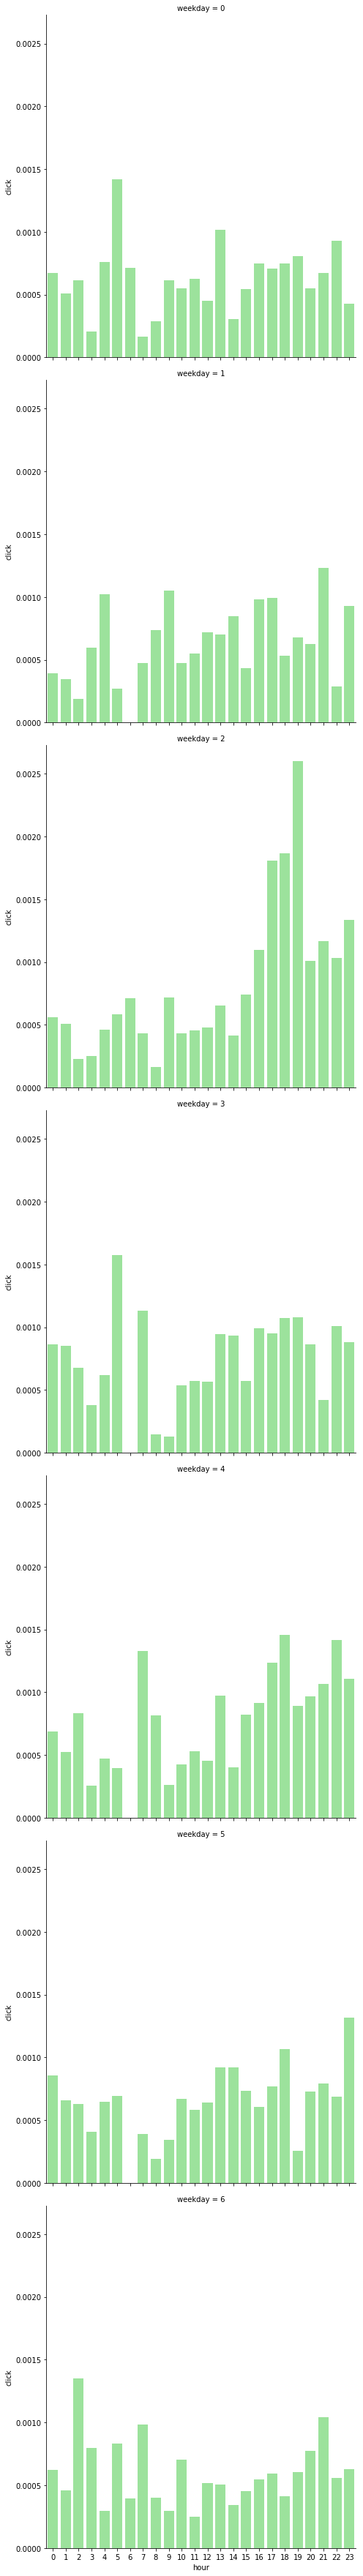

In [13]:
g = sns.FacetGrid(train, row = "weekday", size = 7)
g = g.map(sns.barplot, "hour", "click", color = "lightgreen", ci = None)

C:\Users\asfak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


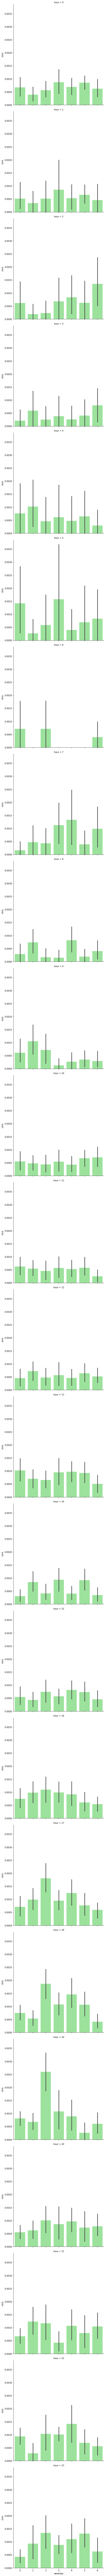

In [14]:
g = sns.FacetGrid(train, row = "hour", size = 7)
g = g.map(sns.barplot, "weekday", "click", color = "lightgreen")

As can be seen, CTR presents different behavior for different parts of the day for different weekdays. That might indicate , that it worths creating a new feature which will indicate weekday and part of the day, e.g. Monday_Morning, Monday_Afternoon, Monday_Night etc...

### Slotvisibility

In [15]:
# plt.figure(figsize = (12,6))
# sns.barplot(x = "slotvisibility", y = "CTR", data = Aggregated_CTR(train, "slotvisibility"), color = "lightgreen")

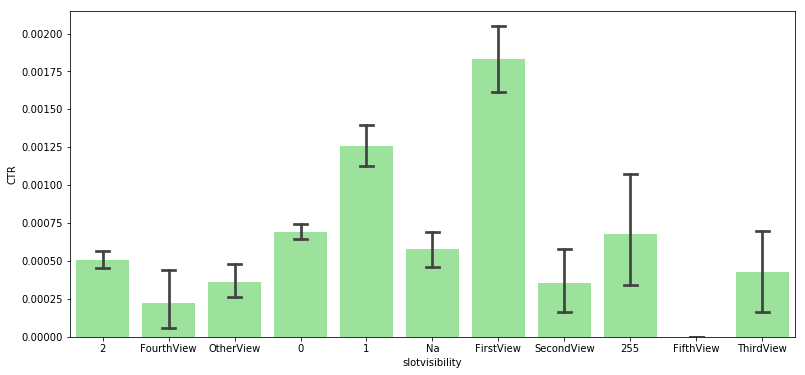

In [16]:
plt.figure(figsize = (13,6))
sns.barplot(x = "slotvisibility", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Region

In [17]:
# plt.figure(figsize = (12,6))
# sns.barplot(x = "region", y = "CTR", data = Aggregated_CTR(train, "region"), color = "lightgreen")
# plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

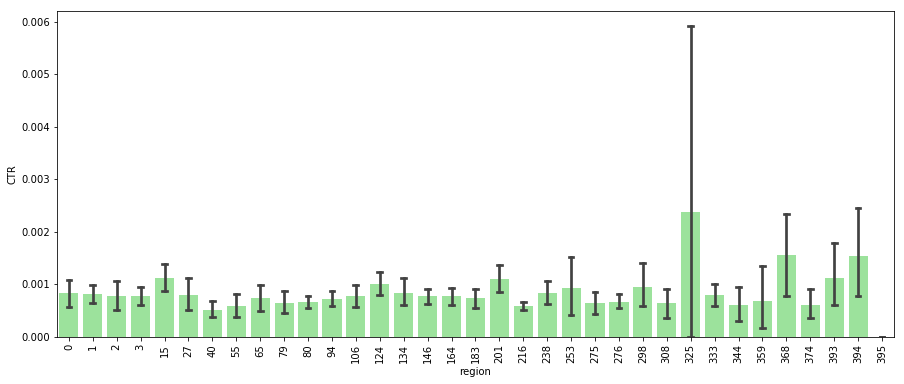

In [18]:
plt.figure(figsize = (15,6))
sns.barplot(x = "region", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")
plt.xticks(rotation = 90)

### City

In [19]:
ctr_city = Aggregated_CTR(train, "city")
ctr_city.sort_values(["CTR"], ascending = False)

,city,CTR
286,373.0,0.691563
307,361.0,0.485437
350,326.0,0.378072
297,21.0,0.275103
190,119.0,0.244598
324,195.0,0.235294
225,131.0,0.230061
70,132.0,0.228833
301,68.0,0.223514
354,255.0,0.212766


### Ad Exchange

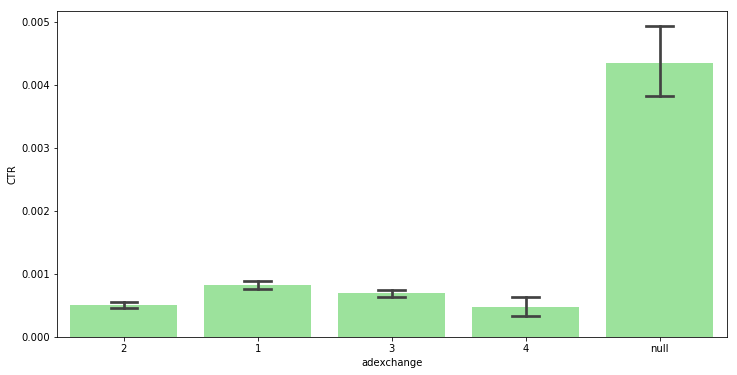

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = "adexchange", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Domain

In [21]:
print("Feature domain has {} unique values which represents {}% of total values".format(len(train.domain.unique()),
                                                                                        len(train.domain.unique())*100/train.shape[0]))

Feature domain has 23013 unique values which represents 0.9466548689603086% of total values


### Slotformat

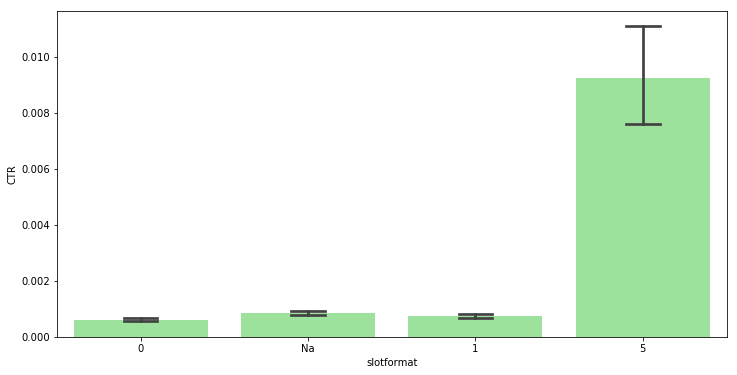

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x = "slotformat", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Slotprice

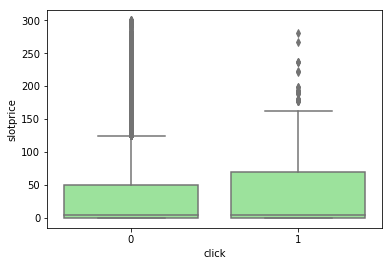

In [23]:
plt.figure(figsize = (6,4))
sns.boxplot(x = "click", y = "slotprice", data = train, color = "lightgreen")

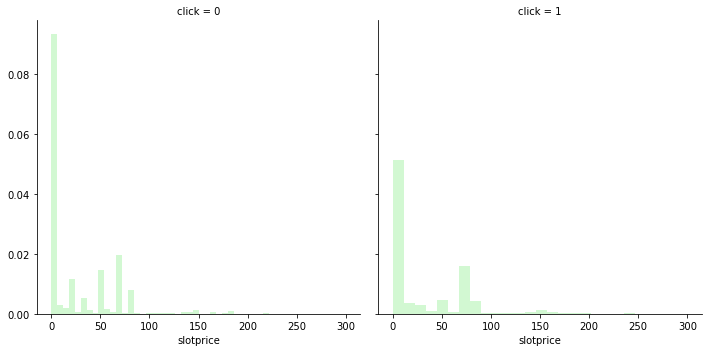

In [24]:
g1 = sns.FacetGrid(train, col = "click", size = 5)
g1 = g1.map(sns.distplot, "slotprice", norm_hist = True, kde = False, color = "lightgreen")

I am not really sure what slot price stands for.

### Advertiser

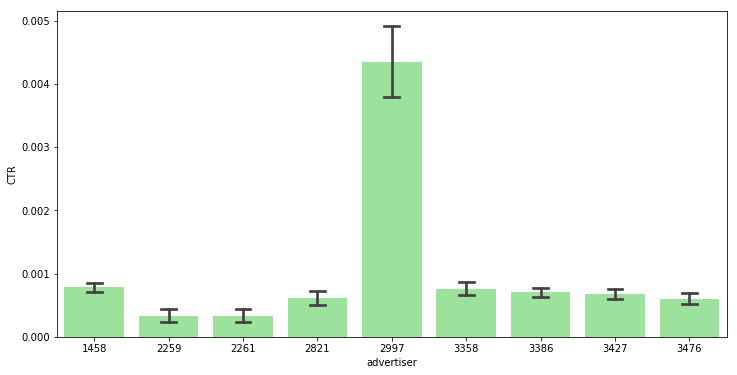

In [25]:
plt.figure(figsize = (12,6))
sns.barplot(x = "advertiser", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("CTR")

### Creative

Definition: A brief description about a service or product that the advertiser wishes to promote.

In [26]:
len(train.creative.unique())

131

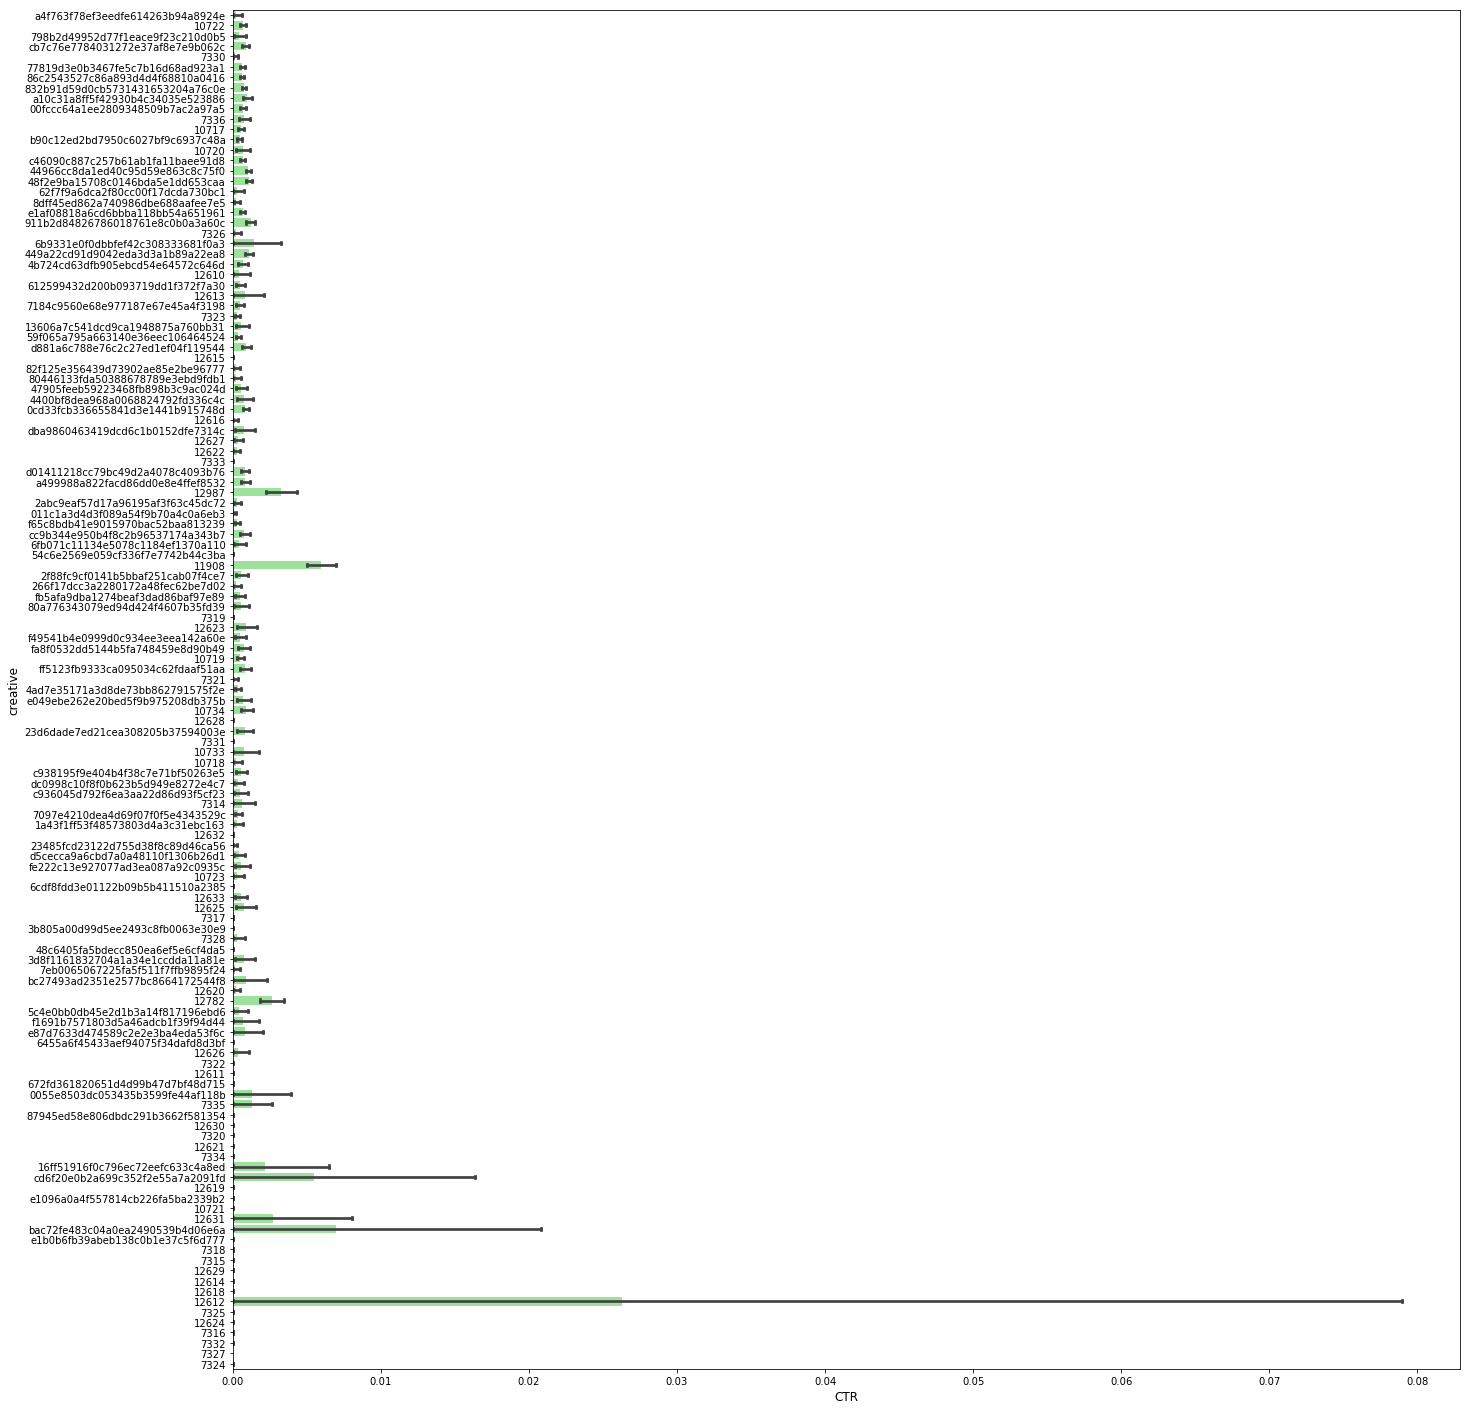

In [27]:
plt.figure(figsize = (22,25))
sns.barplot(y = "creative", x = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.ylabel("creative", fontsize = 12)
plt.xlabel("CTR", fontsize = 12)

In [28]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

### Bidprice VS Payprice

In [56]:
train['BidPayDifference'] = (train["bidprice"]-train["payprice"]).copy(True)

c:\users\akis-\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Bid price average for clicks: 273.9257425742574
Bid price average for non-clicks: 273.05251824853565 

Pay price average for clicks: 105.71782178217822
Pay price average for non-clicks: 78.21572617154446 

Bid-Pay-Difference average for clicks: 168.20792079207922
Bid-Pay-Difference average for non-clicks: 194.8367920769912 



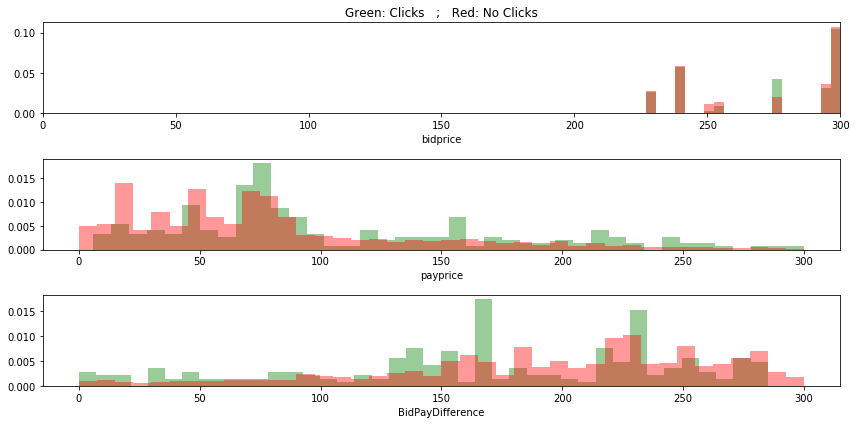

In [58]:
plt.figure(figsize = (12,6))

ax = plt.subplot(3,1,1)
sns.distplot(train.loc[train["click"] == 1, "bidprice"], bins = 20, kde = False, norm_hist = True, color = "green")
ax = plt.subplot(3,1,1)
sns.distplot(train.loc[train["click"] == 0, "bidprice"], bins = 20, kde = False, norm_hist = True, color = "red")
ax.set_xlim([0,300])
ax.set_title("Green: Clicks   ;   Red: No Clicks")

ax = plt.subplot(3,1,2)
sns.distplot(train.loc[train["click"] == 1, "payprice"], bins = 40, kde = False, norm_hist = True, color = "green")
ax = plt.subplot(3,1,2)
sns.distplot(train.loc[train["click"] == 0, "payprice"], bins = 40, kde = False, norm_hist = True, color = "red")

ax = plt.subplot(3,1,3)
sns.distplot(train.loc[train["click"] == 1, "BidPayDifference"], bins = 40, kde = False, norm_hist = True, color = "green")
ax = plt.subplot(3,1,3)
sns.distplot(train.loc[train["click"] == 0, "BidPayDifference"], bins = 40, kde = False, norm_hist = True, color = "red")

plt.tight_layout()

print("Bid price average for clicks:",train.loc[train["click"] == 1, "bidprice"].mean())
print("Bid price average for non-clicks:",train.loc[train["click"] == 0, "bidprice"].mean(),"\n")

print("Pay price average for clicks:",train.loc[train["click"] == 1, "payprice"].mean())
print("Pay price average for non-clicks:",train.loc[train["click"] == 0, "payprice"].mean(),"\n")

print("Bid-Pay-Difference average for clicks:",train.loc[train["click"] == 1, "BidPayDifference"].mean())
print("Bid-Pay-Difference average for non-clicks:",train.loc[train["click"] == 0, "BidPayDifference"].mean(),"\n")

## Feature Engineering

In [30]:
def UsertagCategories(df):
    
    # Find unique usertags
    usertags_list = [train["usertag"][i].split(",") for i in range(train.shape[0])]
    ## itertools.chain.from_iterable joins a list of lists into a single list
    list_combined = np.unique(list(itertools.chain.from_iterable(usertags_list)))
    usertags = [i for i in list_combined if i != "null"]
    
    for tag in usertags:
        df[tag] = df["usertag"].map(lambda x: 1 if tag in x.split(",") else 0)
        
    return df


def FeatureEngineering(df):
        
        # Operating system
        df["os"] = df["useragent"].map(lambda x: x.split("_")[0])
        
        # Browser
        df["browser"] = df["useragent"].map(lambda x: x.split("_")[0])
        
        # Slotarea
        df["slotarea"] = df["slotwidth"]*df["slotheight"]   ####.astype("category")
        
        # Part of the day
        df["part_of_the_day"] = ""
        
        df.loc[(df["weekday"] == 0) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Sunday_Night"
        df.loc[(df["weekday"] == 0) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Sunday_Morning"
        df.loc[(df["weekday"] == 0) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Sunday_Evening"
        
        df.loc[(df["weekday"] == 1) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Monday_Night"
        df.loc[(df["weekday"] == 1) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Monday_Morning"
        df.loc[(df["weekday"] == 1) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Monday_Evening"

        
        df.loc[(df["weekday"] == 2) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 2) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 2) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 3) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Wednesday_Night"
        df.loc[(df["weekday"] == 3) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Wednesday_Morning"
        df.loc[(df["weekday"] == 3) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Wednesday_Evening"

        df.loc[(df["weekday"] == 4) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Tuesday_Night"
        df.loc[(df["weekday"] == 4) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Tuesday_Morning"
        df.loc[(df["weekday"] == 4) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Tuesday_Evening"

        df.loc[(df["weekday"] == 5) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Friday_Night"
        df.loc[(df["weekday"] == 5) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Friday_Morning"
        df.loc[(df["weekday"] == 5) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Friday_Evening"

        
        df.loc[(df["weekday"] == 6) & (df["hour"] > 0) & (df["hour"] <=8), "part_of_the_day"] = "Saturday_Night"
        df.loc[(df["weekday"] == 6) & (df["hour"] > 8) & (df["hour"] < 17), "part_of_the_day"] = "Saturday_Morning"
        df.loc[(df["weekday"] == 6) & (((df["hour"] >= 17) & (df["hour"] <= 23)) | ((df["hour"] == 0))), "part_of_the_day"] = "Saturday_Evening"
        
        # Slotprice binning
        df["slotprice_cat"] = 0
        
        df.loc[ df["slotprice"] <= 10, "slotprice_cat"] = 0
        df.loc[ (df["slotprice"] > 10) & (df["slotprice"] <= 50), "slotprice_cat"] = 1
        df.loc[ (df["slotprice"] > 50) & (df["slotprice"] <= 100), "slotprice_cat"] = 2
        df.loc[ df["slotprice"] > 100, "slotprice_cat"] = 3

        
        # Usertags
        df = UsertagCategories(df)
        
  
        return df

In [31]:
train = FeatureEngineering(train)

In [32]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag',
       'os', 'browser', 'slotarea', 'part_of_the_day', 'slotprice_cat',
       '10006', '10024', '10031', '10048', '10052', '10057', '10059', '10063',
       '10067', '10074', '10075', '10076', '10077', '10079', '10083', '10093',
       '10102', '10110', '10111', '10114', '10115', '10116', '10117', '10118',
       '10120', '10123', '10125', '10126', '10127', '10129', '10130', '10131',
       '10133', '10138', '10140', '10142', '10145', '10146', '10147', '10148',
       '10149', '10684', '11092', '11278', '11379', '11423', '11512', '11576',
       '11632', '11680', '11724', '11944', '13042', '13403', '13496', '13678',
       '13776', '13800', '13866', '13874', '14273', '15398', '16593',

In [33]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser,slotarea,part_of_the_day,slotprice_cat,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,10075,10076,10077,10079,10083,10093,10102,10110,10111,10114,10115,10116,10117,10118,10120,10123,10125,10126,10127,10129,10130,10131,10133,10138,10140,10142,10145,10146,10147,10148,10149,10684,11092,11278,11379,11423,11512,11576,11632,11680,11724,11944,13042,13403,13496,13678,13776,13800,13866,13874,14273,15398,16593,16617,16661,16706,16751,16753
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,trqRTvKaXTKfgg24JKTI,6447a7dfa30fe6eb410c91860e7c9b45,null,2015392487,200,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,windows,40000,Friday_Evening,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,20fc675468712705dbf5d3eda94126da,3ddf173a94bd23c326683b6373c75dd4,null,mm_10982364_973726_8930541,300,250,FourthView,Na,0,10722,294,23,null,2821,null,windows,windows,75000,Monday_Evening,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,trqRTJn7O95I1mKYUV,625d1b5916ea925332c7b326c0574cfa,null,1720123646,250,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,windows,62500,Wednesday_Morning,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,5F97t5E0BTK7XhNrUMpENpn,dedc488b98ca20707bc9a723957e7d1f,null,mm_10027070_118039_10308280,160,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,windows,96000,Saturday_Evening,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,13625cb070ffb306b425cd803c4b7ab4,4199d1227c511fc776b76594dabff9f8,null,1120200150,728,90,OtherView,Na,133,7330,277,133,null,2259,null,windows,windows,65520,Friday_Night,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


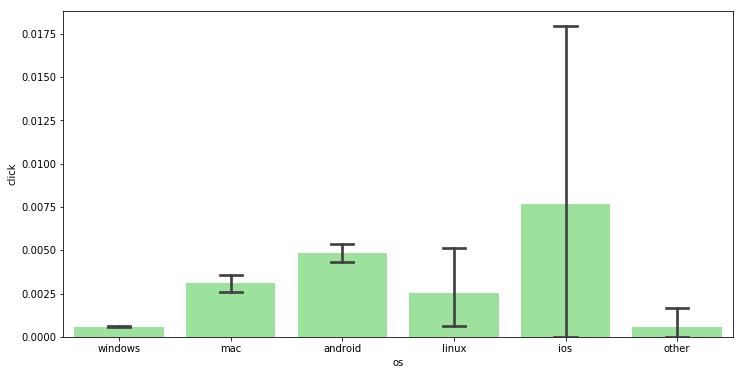

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(x = "os", y = "click", data = train, color = "lightgreen", capsize = 0.2)

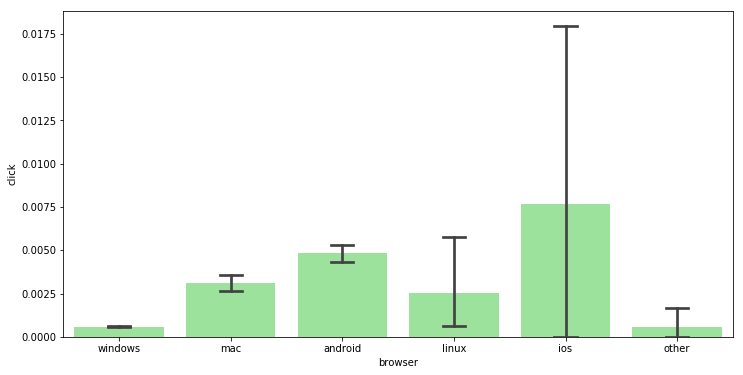

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(x = "browser", y = "click", data = train, color = "lightgreen", capsize = 0.2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

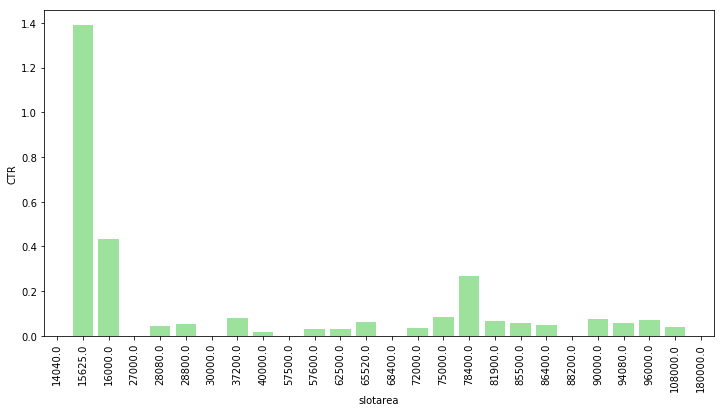

In [36]:
plt.figure(figsize = (12,6))
sns.barplot(x = "slotarea", y = "CTR", data = Aggregated_CTR(train, "slotarea"), color = "lightgreen")
plt.xticks(rotation = 90)

Slotarea must be used as numerical or categorical variable??

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

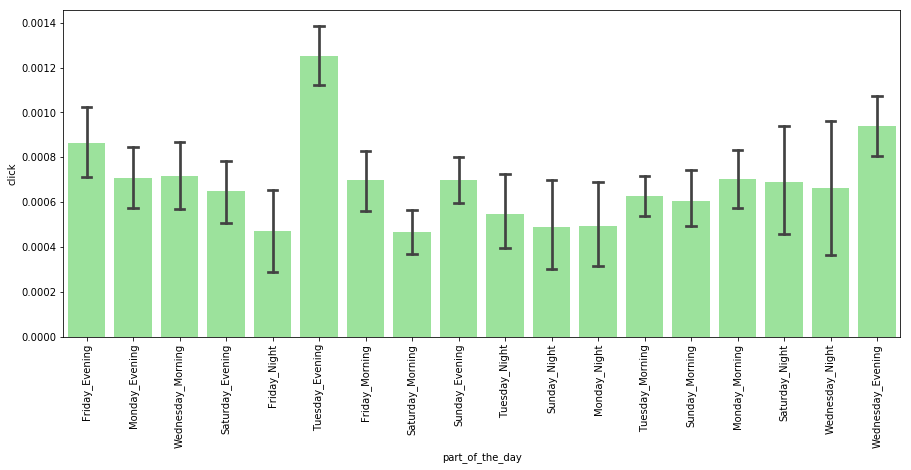

In [37]:
plt.figure(figsize = (15,6))
sns.barplot(x = "part_of_the_day", y = "click", data = train, color = "lightgreen", capsize = 0.2)
plt.xticks(rotation = 90)

### Usertag

In [38]:
train.columns[29:]

Index(['slotprice_cat', '10006', '10024', '10031', '10048', '10052', '10057',
       '10059', '10063', '10067', '10074', '10075', '10076', '10077', '10079',
       '10083', '10093', '10102', '10110', '10111', '10114', '10115', '10116',
       '10117', '10118', '10120', '10123', '10125', '10126', '10127', '10129',
       '10130', '10131', '10133', '10138', '10140', '10142', '10145', '10146',
       '10147', '10148', '10149', '10684', '11092', '11278', '11379', '11423',
       '11512', '11576', '11632', '11680', '11724', '11944', '13042', '13403',
       '13496', '13678', '13776', '13800', '13866', '13874', '14273', '15398',
       '16593', '16617', '16661', '16706', '16751', '16753'],
      dtype='object')

In [40]:
tags = pd.DataFrame(columns = ["Usertag", "CTR"])
i = 0

for col in train.columns[29:]:
    
    impr = train[col].sum()
    clicks = train.loc[ (train[col] == 1) & (train["click"] == 1) ].shape[0]
    ctr = clicks*100/impr
    
    tags.loc[i] = [col, ctr]
    i+=1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]), <a list of 69 Text xticklabel objects>)

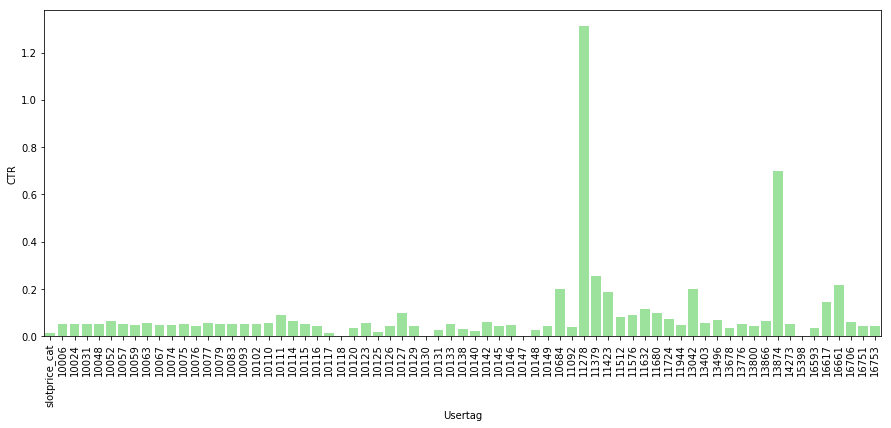

In [41]:
plt.figure(figsize = (15,6))
sns.barplot(x = "Usertag", y = "CTR", data = tags, color = "lightgreen")
plt.xticks(rotation = 90)

### Slotprice_cat

In [42]:
train["slotprice_cat"] = 0
        
train.loc[ train["slotprice"] <= 10, "slotprice_cat"] = 0
train.loc[ (train["slotprice"] > 10) & (train["slotprice"] <= 50), "slotprice_cat"] = 1
train.loc[ (train["slotprice"] > 50) & (train["slotprice"] <= 100), "slotprice_cat"] = 2
train.loc[ train["slotprice"] > 100, "slotprice_cat"] = 3

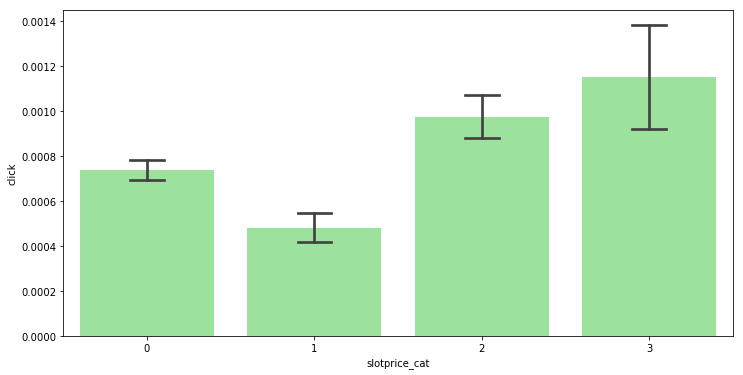

In [43]:
plt.figure(figsize = (12,6))
sns.barplot(x = "slotprice_cat", y = "click", data = train, color = "lightgreen", capsize = 0.2)

In [44]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag',
       'os', 'browser', 'slotarea', 'part_of_the_day', 'slotprice_cat',
       '10006', '10024', '10031', '10048', '10052', '10057', '10059', '10063',
       '10067', '10074', '10075', '10076', '10077', '10079', '10083', '10093',
       '10102', '10110', '10111', '10114', '10115', '10116', '10117', '10118',
       '10120', '10123', '10125', '10126', '10127', '10129', '10130', '10131',
       '10133', '10138', '10140', '10142', '10145', '10146', '10147', '10148',
       '10149', '10684', '11092', '11278', '11379', '11423', '11512', '11576',
       '11632', '11680', '11724', '11944', '13042', '13403', '13496', '13678',
       '13776', '13800', '13866', '13874', '14273', '15398', '16593',

# Statistics per Advertiser

In [45]:
train["advertiser"].value_counts()

1458    492353
3386    455041
3427    402806
3476    310835
3358    264956
2821    211366
2259    133673
2261    110122
2997     49829
Name: advertiser, dtype: int64

In [46]:
advert = train["advertiser"].unique()
advert

array([3427, 2821, 1458, 2259, 3386, 3358, 3476, 2261, 2997], dtype=int64)

## Summary Statistics

In [47]:
df = pd.DataFrame(columns = ["Advertiser", "Impressions", "Clicks", "Bids", "Cost", "CTR", "eCPC", "CPM"])

In [48]:
cny_currency = 0.15765
i=0

for adv in advert:
    
    # Impressions
    imp = train.loc[ train["advertiser"] == adv ].shape[0]
    
    # Clicks
    clicks = train.loc[ train["advertiser"] == adv ]["click"].sum()
    
    # Bids
    bids = train.loc[ train["advertiser"] == adv ]["bidprice"].sum()
    
    # Paid
    cost = train.loc[ train["advertiser"] == adv ]["payprice"].sum()
    
    # CTR
    ctr = clicks*100/imp
    
    # eCPC
    e_cpc = cost/clicks
    
    # CPM
    cpm = cost*1000/imp
    
    # Store results
    df.loc[i] = [adv, imp, clicks, bids, cost, ctr, e_cpc, cpm]
    i+=1

In [49]:
df

,Advertiser,Impressions,Clicks,Bids,Cost,CTR,eCPC,CPM
0,3427.0,402806.0,272.0,95218860.0,30458711.0,0.067526,111980.555147,75616.328952
1,2821.0,211366.0,131.0,61343675.0,18828044.0,0.061978,143725.526718,89077.921709
2,1458.0,492353.0,385.0,147705900.0,33968736.0,0.078196,88230.483117,68992.645521
3,2259.0,133673.0,43.0,38508376.0,12428238.0,0.032168,289028.790698,92974.931362
4,3386.0,455041.0,320.0,136512300.0,34931823.0,0.070323,109161.946875,76766.319958
5,3358.0,264956.0,202.0,61729738.0,22447231.0,0.076239,111124.905941,84720.598892
6,3476.0,310835.0,187.0,77042367.0,23918779.0,0.060161,127907.909091,76950.082841
7,2261.0,110122.0,36.0,31701699.0,9873779.0,0.032691,274271.638889,89662.183760
8,2997.0,49829.0,217.0,13802633.0,3129267.0,0.435489,14420.585253,62800.116398


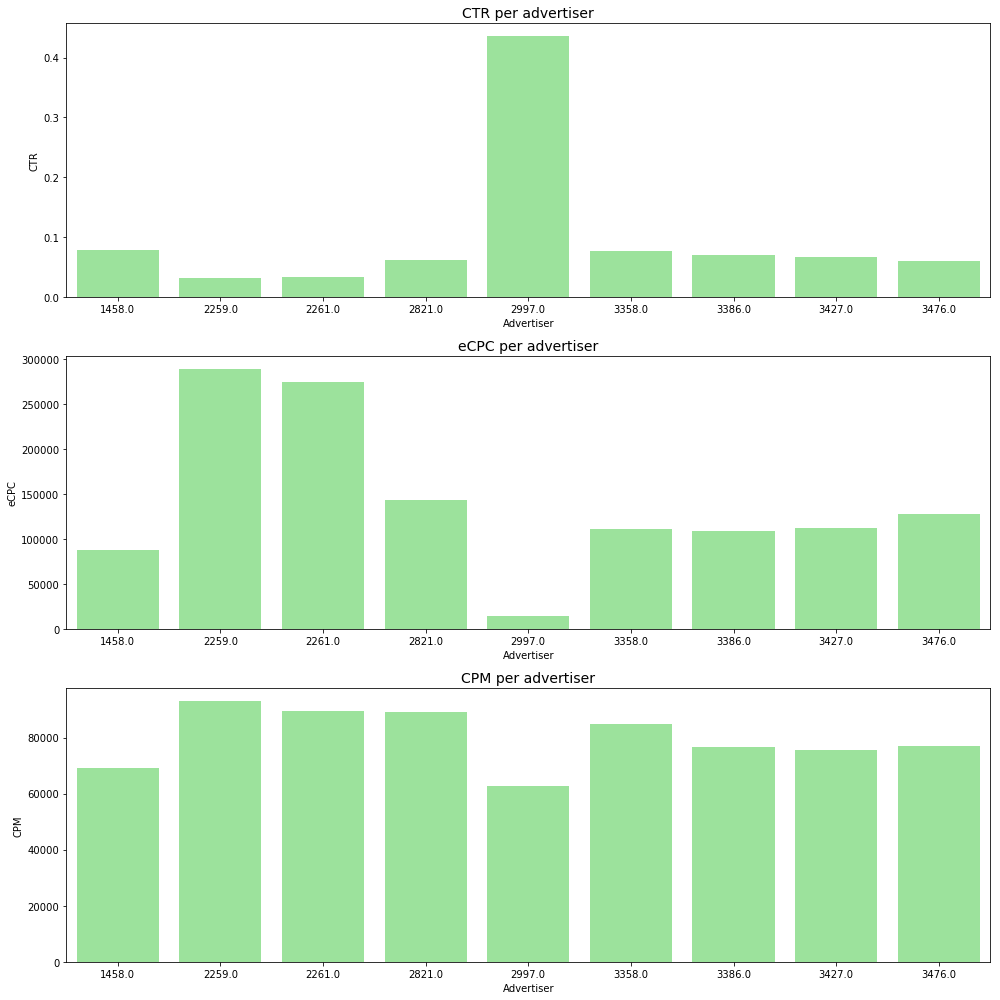

In [50]:
plt.figure(figsize = (14,14))

plt.subplot(3,1,1)
sns.barplot(x = "Advertiser", y = "CTR", data = df, color = "lightgreen")
plt.title("CTR per advertiser", fontsize = 14)

plt.subplot(3,1,2)
sns.barplot(x = "Advertiser", y = "eCPC", data = df, color = "lightgreen")
plt.title("eCPC per advertiser", fontsize = 14)

plt.subplot(3,1,3)
sns.barplot(x = "Advertiser", y = "CPM", data = df, color = "lightgreen")
plt.title("CPM per advertiser", fontsize = 14)

plt.tight_layout()

In [51]:
def CTR(df, advert = [3427], by = "weekday"):
    
    # Advertisers
    #advert = df["advertiser"].unique()
    
    # Unique features
    feat = df[by].unique()
    
    # Create dataframe
    res = pd.DataFrame(columns = ["Advertiser", by, "CTR"])
    i = 0
    
    for adv in advert:
        
        for f in feat:
            
            df_ = df.loc[ (df["advertiser"] == adv) & (df[by] == f)]
        
            # Number of impressions
            impr = df_.shape[0]
    
            # Number of clicks
            clicks = df_["click"].sum()
    
            # CTR
            try:
                ctr = clicks*100/impr
            except ZeroDivisionError:
                ctr = 0
            
            res.loc[i] = [adv, f, ctr]
            i+=1
        
    
    return res

### Weekday

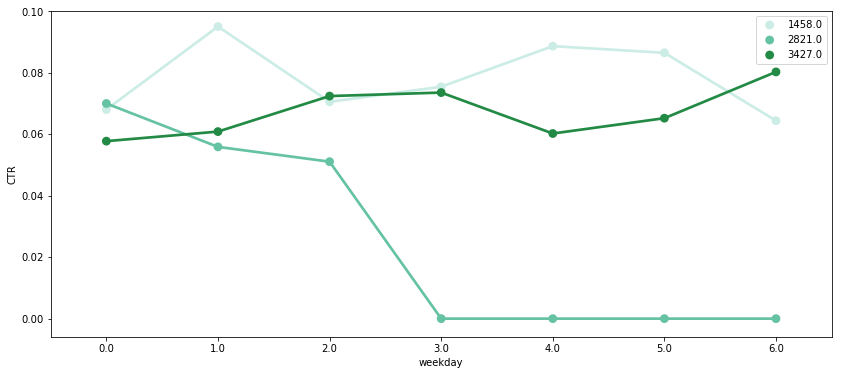

In [52]:
plt.figure(figsize = (14,6))
sns.pointplot(x = "weekday", y = "CTR", hue = "Advertiser", 
              data = CTR(train, advert[:3], by = "weekday"), 
              size = 6, 
              palette="BuGn")
plt.legend(loc = "best")

### Hour

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

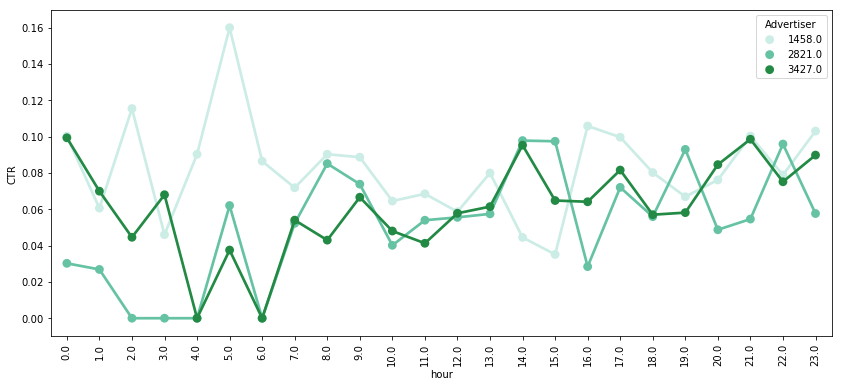

In [53]:
plt.figure(figsize = (14,6))
sns.pointplot(x = "hour", y = "CTR", hue = "Advertiser", 
              data = CTR(train, advert[:3], by = "hour"), 
              size = 6,
              palette="BuGn")
plt.xticks(rotation = 90)

### OS

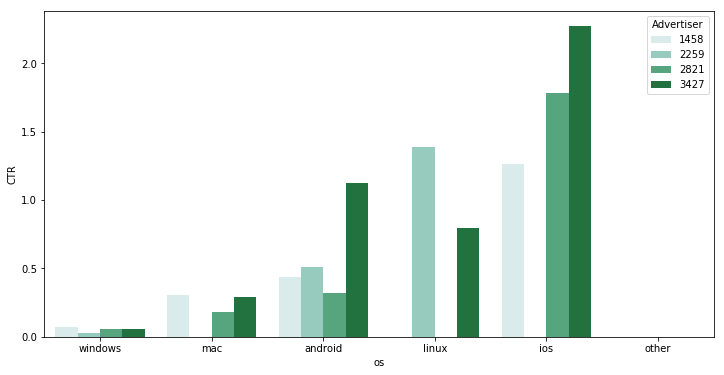

In [54]:
plt.figure(figsize = (12,6))
sns.barplot(x = "os", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "os"),
            palette="BuGn")

### Browser

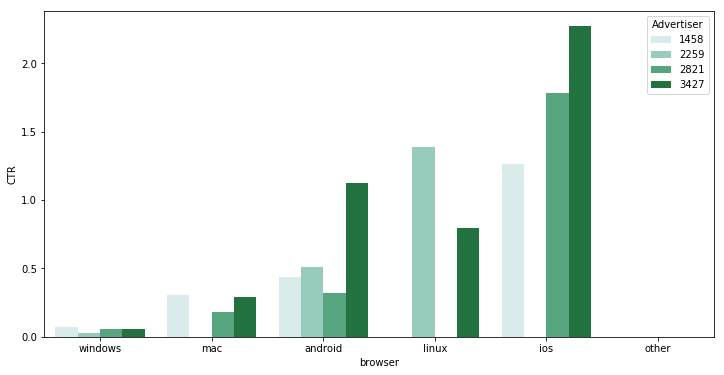

In [55]:
plt.figure(figsize = (12,6))
sns.barplot(x = "browser", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "browser"), 
            palette="BuGn")

### Region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

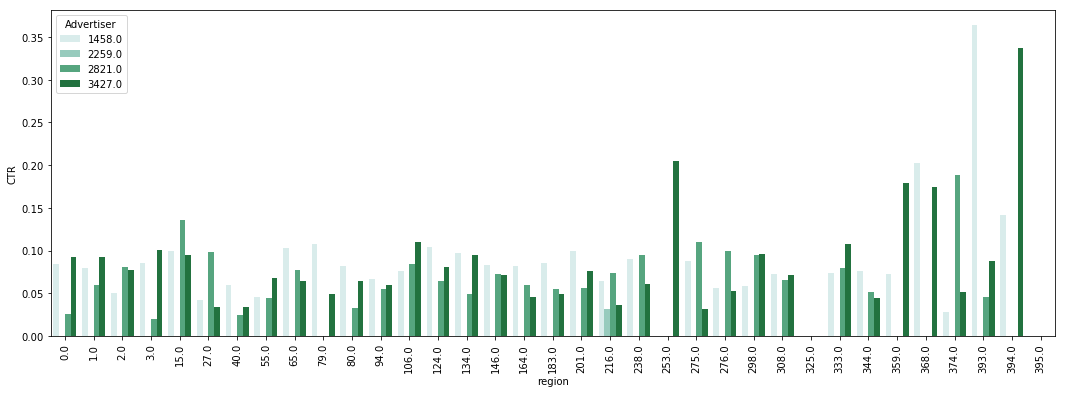

In [56]:
plt.figure(figsize = (18,6))
sns.barplot(x = "region", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "region"),
            palette="BuGn")
plt.xticks(rotation = 90)

### Slot Area

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

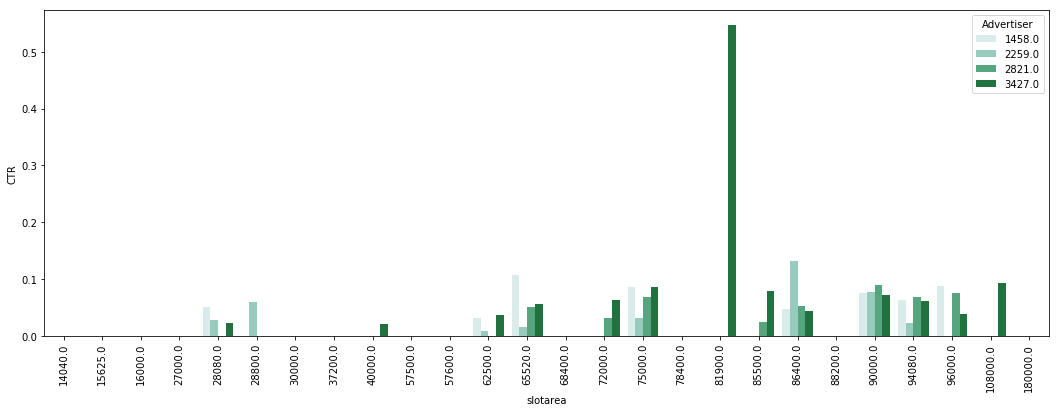

In [57]:
plt.figure(figsize = (18,6))
sns.barplot(x = "slotarea", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "slotarea"),
            palette="BuGn")
plt.xticks(rotation = 90)

### Slot Visibility

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

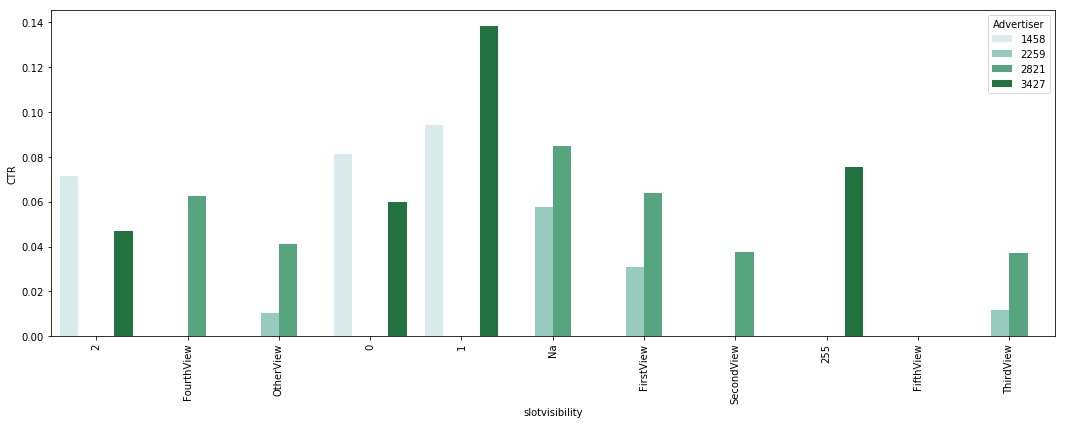

In [58]:
plt.figure(figsize = (18,6))
sns.barplot(x = "slotvisibility", y="CTR", hue = "Advertiser",
            data = CTR(train, advert[:4], by = "slotvisibility"),
            palette="BuGn")
plt.xticks(rotation = 90)

### Ad-exchange

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

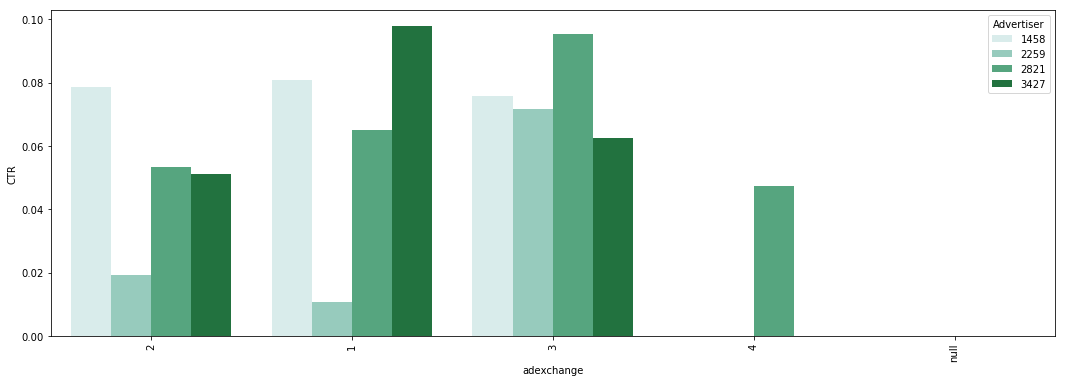

In [59]:
plt.figure(figsize = (18,6))
sns.barplot(x = "adexchange", y="CTR", hue = "Advertiser", 
            data = CTR(train, advert[:4], by = "adexchange"),
            palette="BuGn")
plt.xticks(rotation = 90)